<a href="https://colab.research.google.com/github/Swetha0713/STML_2024_2303A52415/blob/main/PROJECT_STML_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Hotel Reservations.csv'
data = pd.read_csv(file_path)

data.head(), data.columns


(  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
 0   INN00001             2               0                     1   
 1   INN00002             2               0                     2   
 2   INN00003             1               0                     2   
 3   INN00004             2               0                     0   
 4   INN00005             2               0                     1   
 
    no_of_week_nights type_of_meal_plan  required_car_parking_space  \
 0                  2       Meal Plan 1                           0   
 1                  3      Not Selected                           0   
 2                  1       Meal Plan 1                           0   
 3                  2       Meal Plan 1                           0   
 4                  1      Not Selected                           0   
 
   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
 0        Room_Type 1        224          2017             10             2  

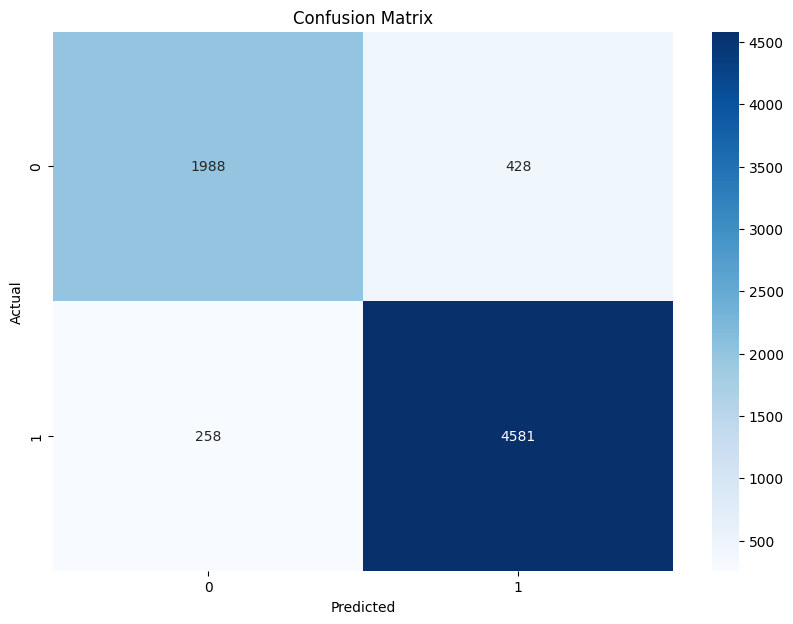

Accuracy: 0.9054445210199862
Precision: 0.9145538031543222
Recall: 0.9466831990080595
F1 Score: 0.9303411860276198

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255



In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != 'booking_status':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

target_encoder = LabelEncoder()
data['booking_status'] = target_encoder.fit_transform(data['booking_status'])

X = data.drop(columns=['Booking_ID', 'booking_status'])
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", class_report)


LOGISTIC REGRESSION

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


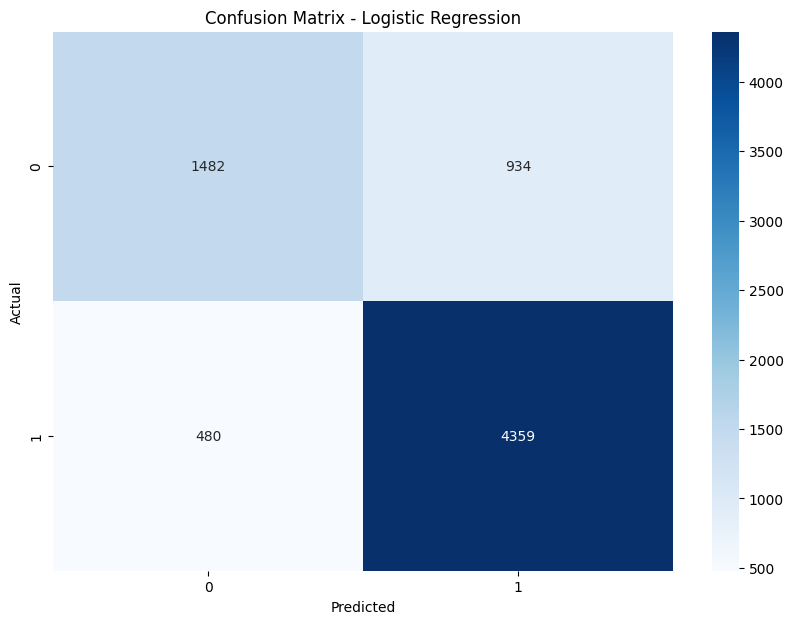


Logistic Regression Metrics:
Accuracy: 0.8050999310820124
Precision: 0.8235405252219913
Recall: 0.9008059516429014
F1 Score: 0.8604421634425582


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Output
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")


KNN

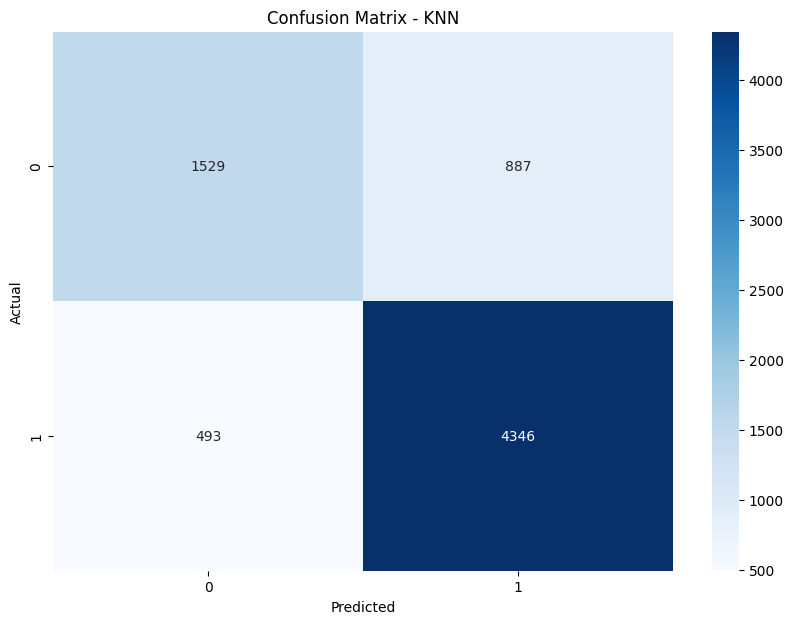


KNN Metrics:
Accuracy: 0.8097863542384562
Precision: 0.8304987578826677
Recall: 0.8981194461665634
F1 Score: 0.8629864972200159


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN')
plt.show()

# Outputs
print("\nKNN Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")


SVM

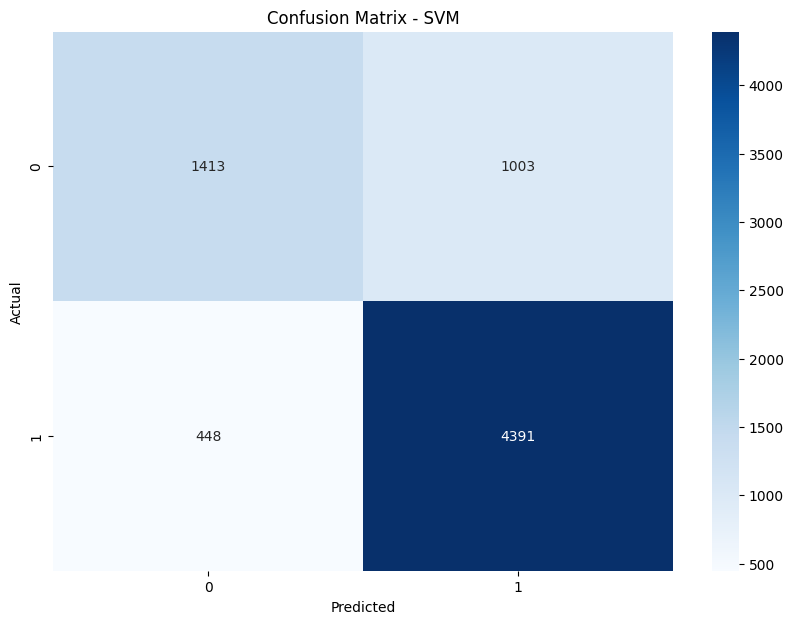

Accuracy: 0.8
Precision: 0.814052651093808
Recall: 0.9074188882000414
F1 Score: 0.858203850288283


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


PERCEPTRON

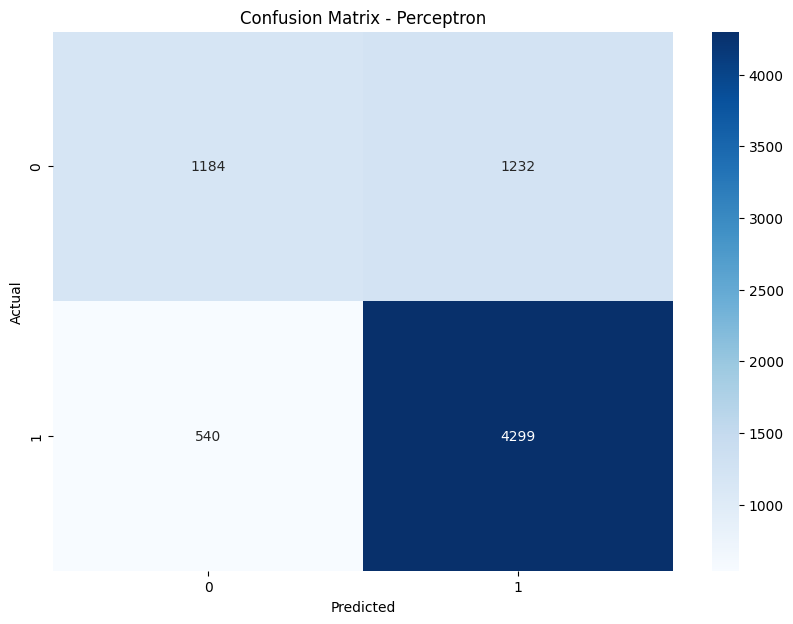

Accuracy: 0.7557546519641627
Precision: 0.777255469173748
Recall: 0.8884066955982641
F1 Score: 0.8291224686595949


In [ ]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(random_state=42, max_iter=1000)
perceptron_model.fit(X_train, y_train)


y_pred_perceptron = perceptron_model.predict(X_test)

conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
class_report_perceptron = classification_report(y_test, y_pred_perceptron)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Perceptron')
plt.show()

# Print metrics
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)
print("F1 Score:", f1_perceptron)


PLOTTING

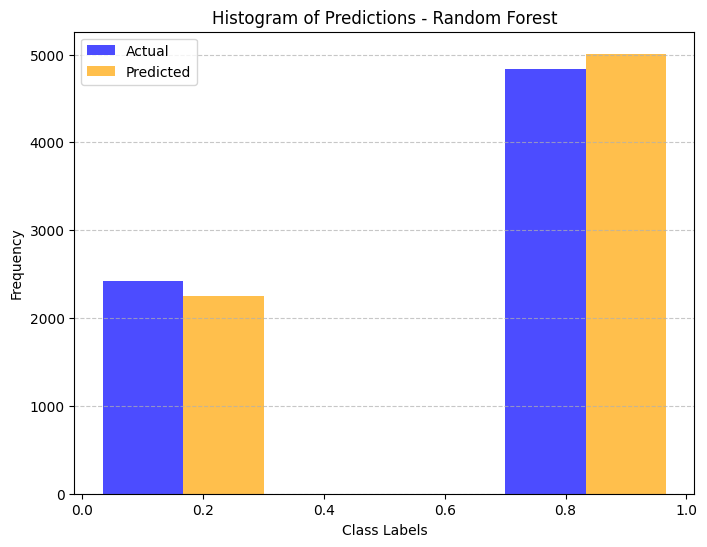

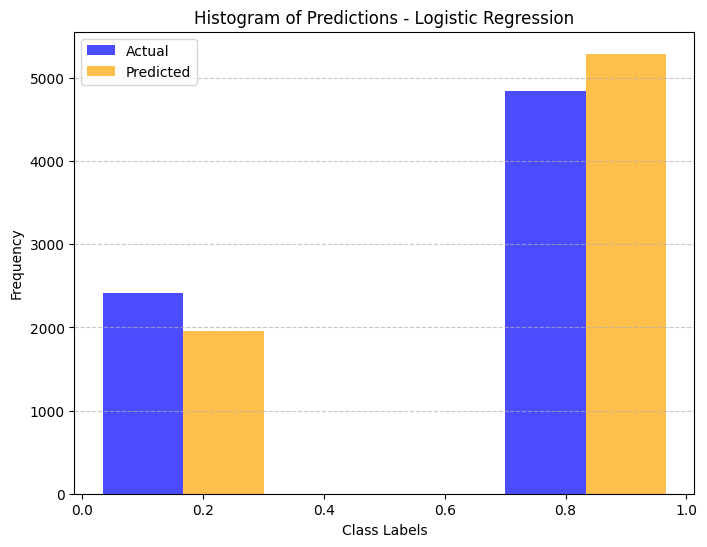

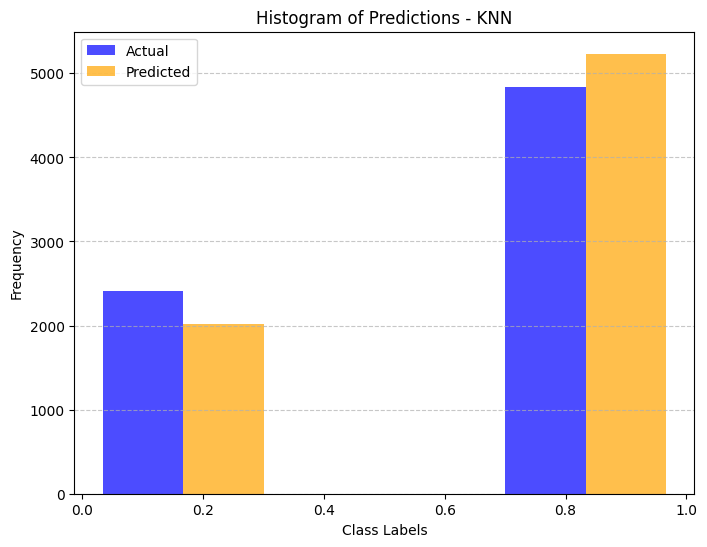

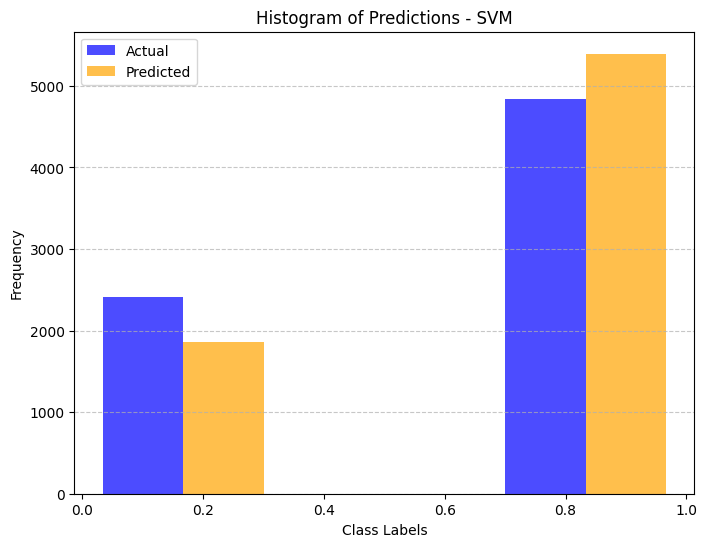

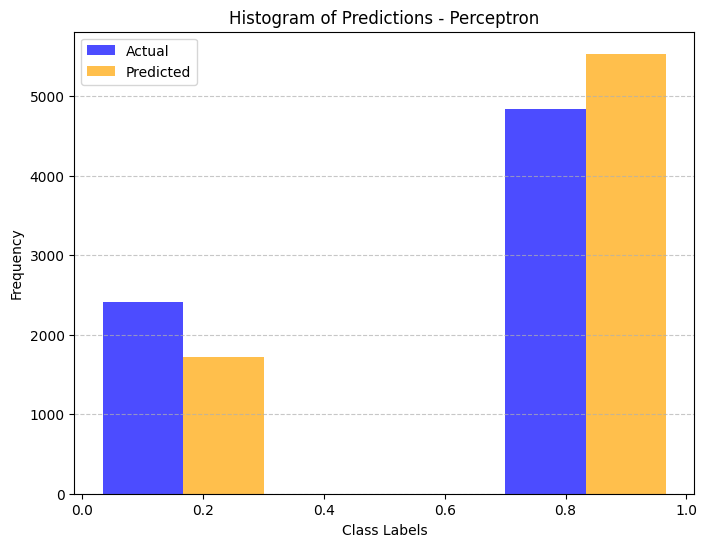

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(predictions, model_name, actual_labels):
    plt.figure(figsize=(8, 6))
    plt.hist([actual_labels, predictions], bins=3, color=['blue', 'orange'], alpha=0.7, label=['Actual', 'Predicted'])
    plt.title(f'Histogram of Predictions - {model_name}')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Random Forest Predictions
plot_histogram(y_pred, "Random Forest", y_test)

# Logistic Regression Predictions
plot_histogram(y_pred_logistic, "Logistic Regression", y_test)

# KNN Predictions
plot_histogram(y_pred_knn, "KNN", y_test)

# SVM Predictions
plot_histogram(y_pred_svm, "SVM", y_test)

# Perceptron Predictions
plot_histogram(y_pred_perceptron, "Perceptron", y_test)


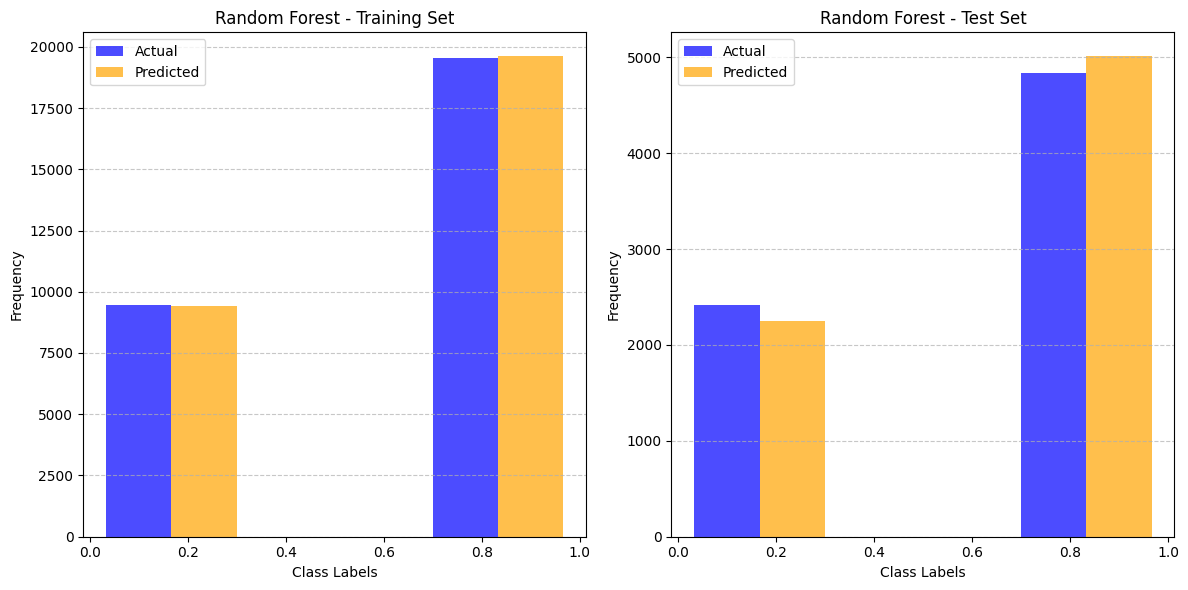

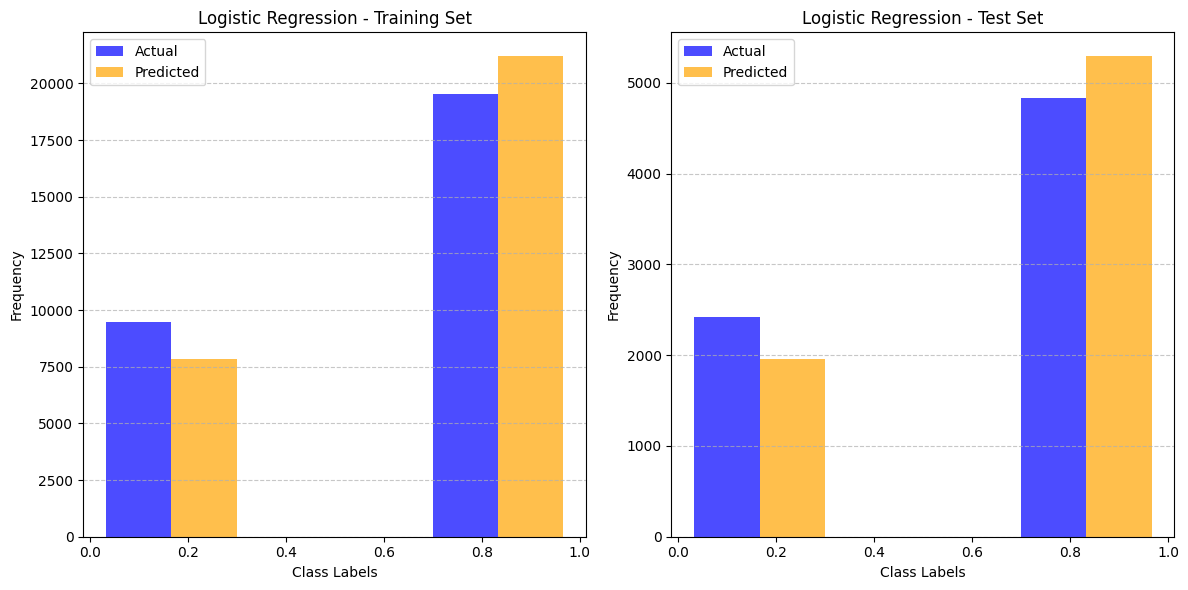

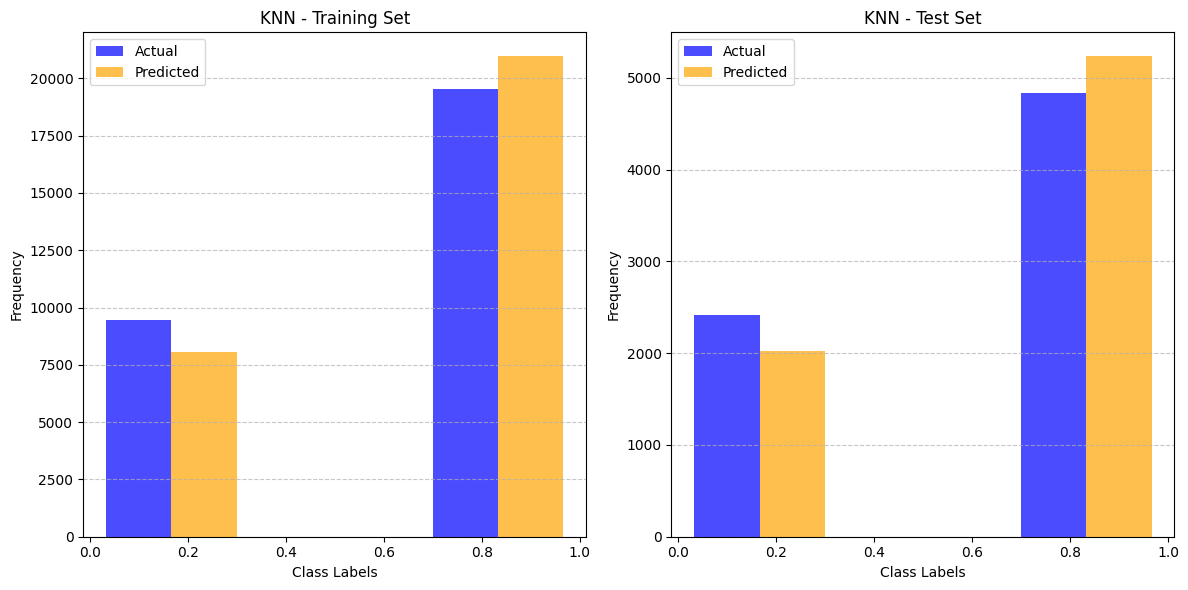

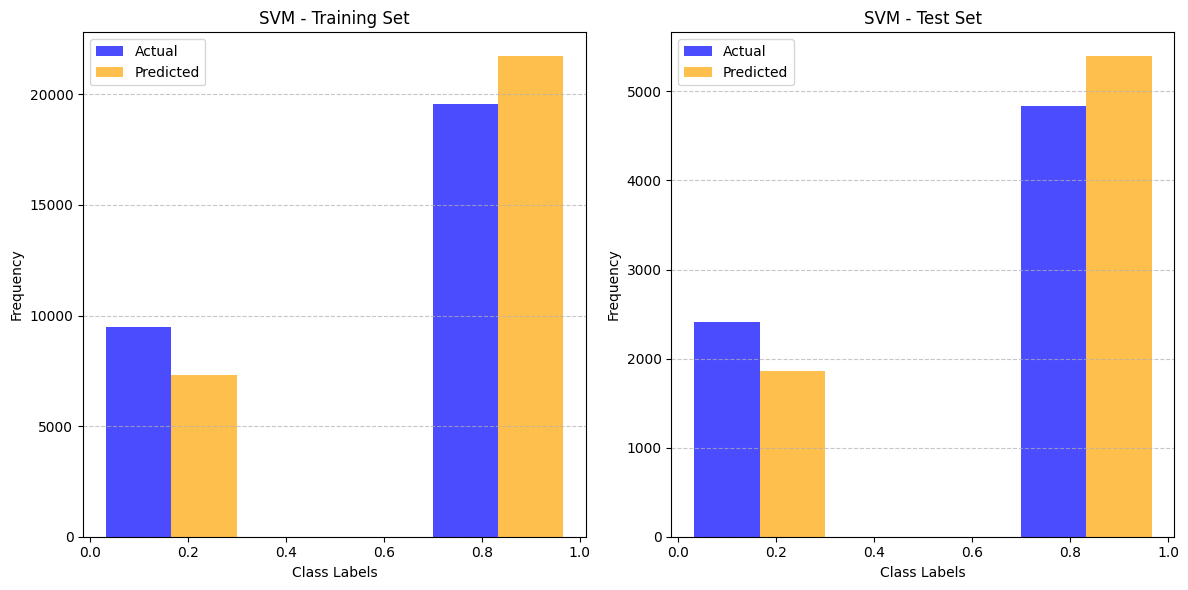

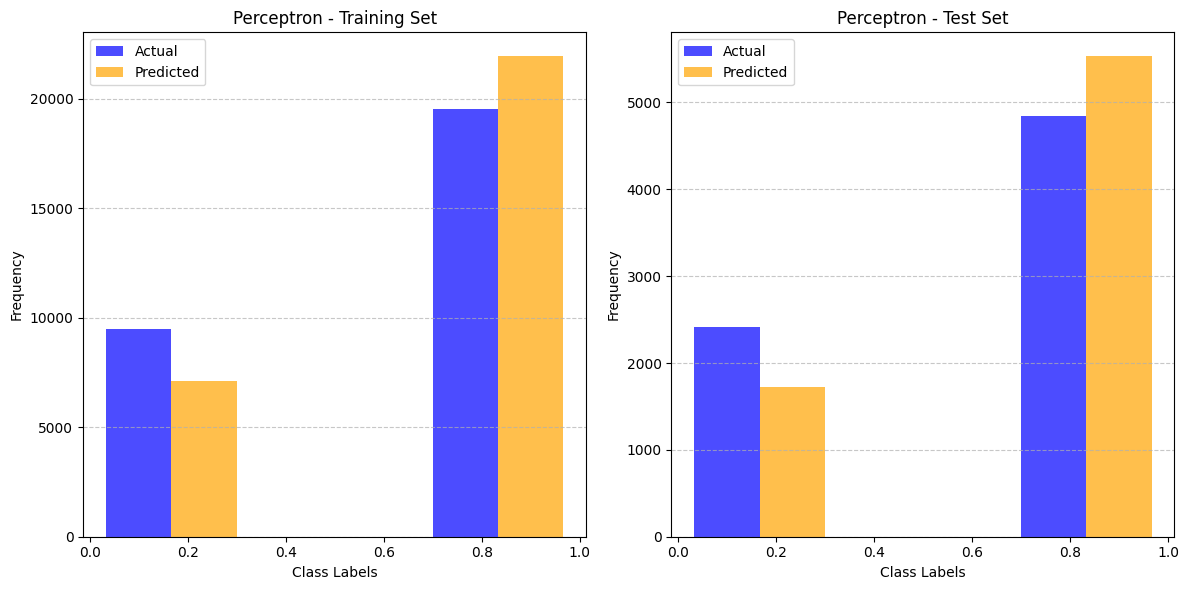

In [ ]:

def plot_overfitting_histogram(y_train_actual, y_train_pred, y_test_actual, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.hist([y_train_actual, y_train_pred], bins=3, color=['blue', 'orange'], alpha=0.7, label=['Actual', 'Predicted'])
    plt.title(f'{model_name} - Training Set')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.hist([y_test_actual, y_test_pred], bins=3, color=['blue', 'orange'], alpha=0.7, label=['Actual', 'Predicted'])
    plt.title(f'{model_name} - Test Set')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Random Forest
y_train_pred_rf = model.predict(X_train)
plot_overfitting_histogram(y_train, y_train_pred_rf, y_test, y_pred, "Random Forest")

# Logistic Regression
y_train_pred_logistic = logistic_model.predict(X_train)
plot_overfitting_histogram(y_train, y_train_pred_logistic, y_test, y_pred_logistic, "Logistic Regression")

# KNN
y_train_pred_knn = knn_model.predict(X_train)
plot_overfitting_histogram(y_train, y_train_pred_knn, y_test, y_pred_knn, "KNN")

# SVM
y_train_pred_svm = svm_model.predict(X_train)
plot_overfitting_histogram(y_train, y_train_pred_svm, y_test, y_pred_svm, "SVM")

# Perceptron
y_train_pred_perceptron = perceptron_model.predict(X_train)
plot_overfitting_histogram(y_train, y_train_pred_perceptron, y_test, y_pred_perceptron, "Perceptron")
